
Project Scenario: I am a Data Scientist with a housing agency in Boston MA, I have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on my experience in Statistics,  I can you provide information to them to help with making an informed decision.
Upper management will get some insight as the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [10]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])
# Import the libraries we need for the project
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df=pd.read_csv(boston_url)
boston_df


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [11]:
boston_df # just to check the data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


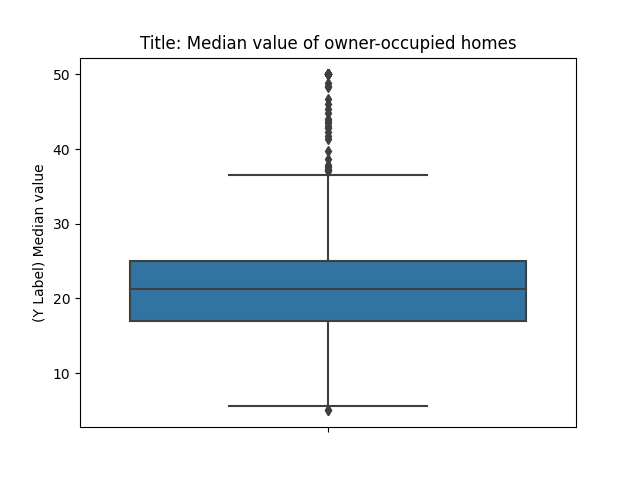

In [12]:
#For the "Median value of owner-occupied homes" we provide a boxplot
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Title: Median value of owner-occupied homes')
plt.ylabel('(Y Label) Median value') #y label
plt.show()

We notice that the most of the properties are near the mean value. Also there are some prorerties there are some properties with  outliers.

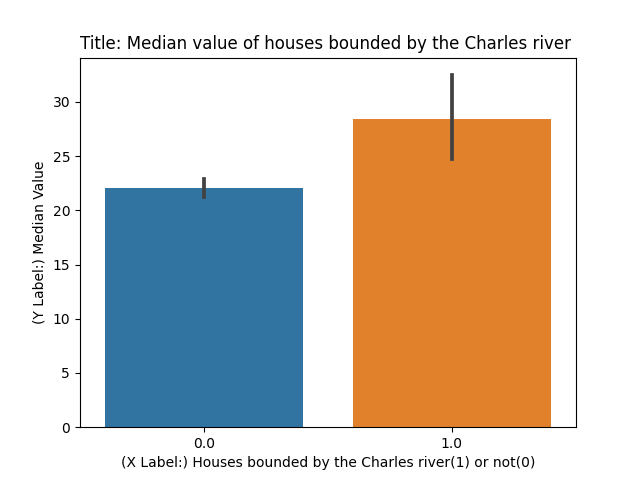

In [13]:
#Provide a  bar plot for the Charles river variable
ax = sns.barplot( y="MEDV", data=boston_df, x="CHAS")
ax.set_title('Title: Median value of houses bounded by the Charles river ')
plt.ylabel('(Y Label:) Median Value') #y label
plt.xlabel('(X Label:) Houses bounded by the Charles river(1) or not(0)')
plt.show()

The chart above shows that there is a significant difference in the median value of houses bounded by the Charles river, the value is higher. 

Q1:	Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

1.	State your hypothesis.
2.	Use α = 0.05
3.	Perform the test Statistics.
4.	State the conclusion from the test.
Answers:
1. State the hypothesis

*   H0: µ1 = µ2 ("there is no significant difference in median value of houses bounded by the Charles river ")
*   H1: µ1 ≠ µ2 ("there is significant difference in median value of houses bounded by the Charles river")

In [14]:
#3.	Perform the test Statistics.
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

4.	State the conclusion from the test
**Conclusion:** Since the p-value is more less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is significant difference in median value of houses bounded by the Charles river

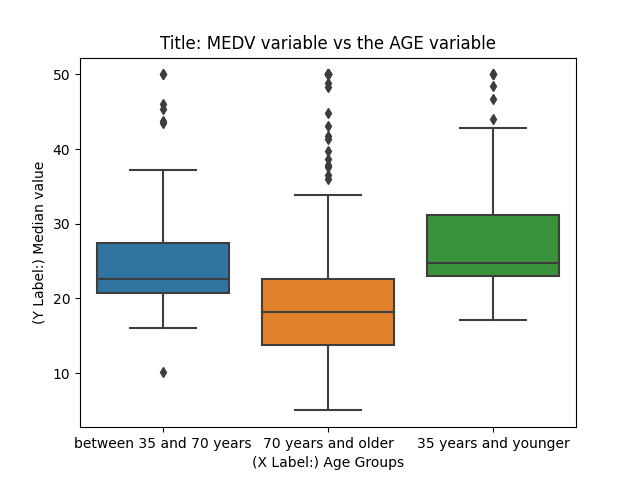

In [15]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_group'] = '70 years and older'
ax = sns.boxplot(y='MEDV', x='Age_group', data=boston_df)
ax.set_title('Title: MEDV variable vs the AGE variable')
plt.ylabel('(Y Label:) Median value') #y label
plt.xlabel('(X Label:) Age Groups') #y label
plt.show()

There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940. The mean values of houses are  significant lower that the others.

Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

1.	State your hypothesis.
2.	Use α = 0.05
3.	Perform the test Statistics.
4.	State the conclusion from the test.
Answers:
1. State the hypothesis

*   H0: µ1 = µ2 = μ3 ("there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")
*   H1: µ1 At least one of the means differ ("there is difference in Median values of houses (MEDV) at least for one proportion of owner occupied units built prior to 1940 (AGE)")

In [30]:
#3.	Perform the test Statistics (ANOVA)

#First, separate the three samples (one for each category) into a variable each.
trirtyfive_lower = boston_df[boston_df['Age_group'] =='35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_group'] =='between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['Age_group'] == '70 years and older']['MEDV']

#trirtyfive_lower
#thirtyfive_seventy
#seventy_older

In [28]:
#Test for equality of variance
scipy.stats.levene(boston_df[boston_df['Age_group'] == '35 years and younger']['MEDV'],
                boston_df[boston_df['Age_group'] == 'between 35 and 70 years']['MEDV'],
                boston_df[boston_df['Age_group'] == '70 years and older']['MEDV'],
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is more than 0.05, the variance are equal

In [29]:

#Now, run a one-way ANOVA.
f_statistic, p_value = scipy.stats.f_oneway(trirtyfive_lower, thirtyfive_seventy, seventy_older, axis=0)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


4.	State the conclusion from the test
**Conclusion:** Since the p-value is more less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is significant difference in median value of houses bounded by the Charles river

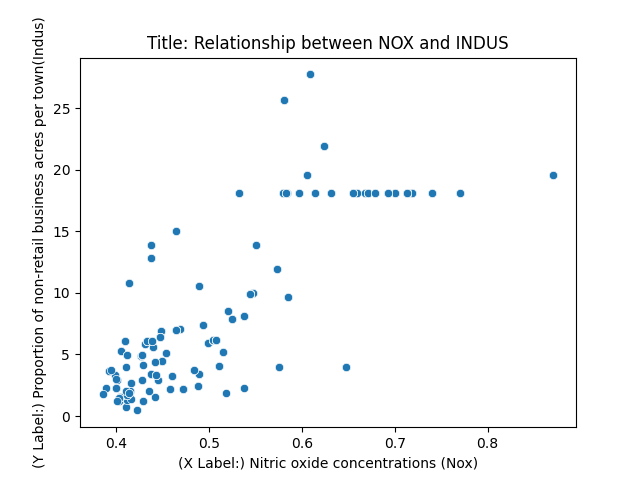

In [31]:
#Since they are both continuous variables we can draw a scatter plot
ax = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df)
ax.set_title('Title: Relationship between NOX and INDUS')
plt.xlabel('(X Label:) Nitric oxide concentrations (Nox)') #x label
plt.ylabel('(Y Label:) Proportion of non-retail business acres per town(Indus)') #y label
plt.show()

We conclude that there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 

Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

1.	State your hypothesis.
2.	Use α = 0.05
3.	Perform the test Statistics.
4.	State the conclusion from the test.

1.State the hypothesis

*   H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   H1: there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Since they are both continuous variables we can use a pearson correlation test

In [34]:
#3.	Perform the test Statistics.
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

4.	State the conclusion from the test.
**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

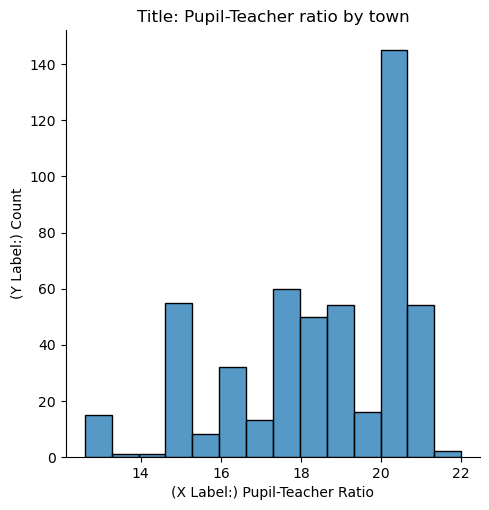

In [ ]:

ax=sns.displot(boston_df['PTRATIO'], kde = False)   #instead distplot which is deprecated and will be removed in seaborn v0.14.0.
ax.set_axis_labels("(X Label:) Pupil-Teacher Ratio", "(Y Label:) Count")
plt.title('Title: Pupil-Teacher ratio by town')
plt.show()

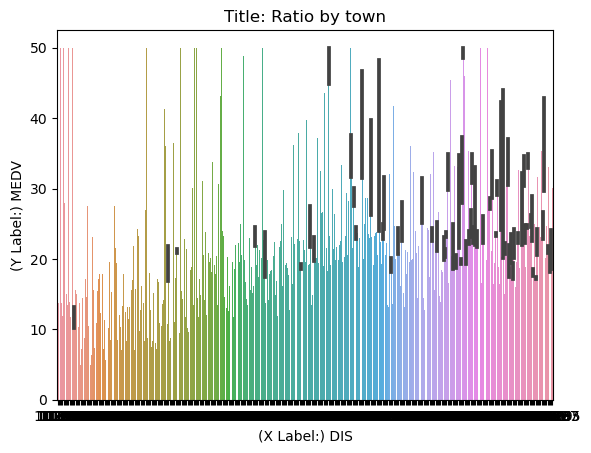

In [ ]:
#Provide a  bar plot for the Charles river variable
ax = sns.barplot( y='MEDV',x='DIS', data=boston_df)
plt.title('Title: Ratio by town')
plt.xlabel('(X Label:) DIS')
plt.ylabel('(Y Label:) MEDV')
plt.show()

Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

1.	State your hypothesis.
2.	Use α = 0.05
3.	Perform the test Statistics.
4.	State the conclusion from the test.

1. State the hypothesis

*   H0:  there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
*   H1:  there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes


In [37]:
#3.	Perform the test Statistics.
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):                   1.52e-146
Time:                        19:37:40   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4.	State the conclusion from the test.
#p-value is more;ess than 0.05 (¬0.00), so we reject the null hypothesis as there there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes